# Playing Slots

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class Slot: # 'Browsing User'
    
    def __init__(self, game):
        self.__probability = np.random.uniform()
        self.game = game
        if self.__probability > self.game.best_probability:
            self.game.best_probability = self.__probability
    
    def __repr__(self):
        return "The secret probability of the slot machine is " + str(self.__probability)
    
    def pull(self):
        if not self.game.pulls_remaining():
            raise Exception ("The player does not have the budget..")
        
        result = np.random.choice((True, False), p = [self.__probability, 1-self.__probability])
        self.game.history.append(result)
        self.game.score +=result
        return result

class Player: # Bidder
    
    def __init__(self, slots):
        self.slots = slots
    
    def play(self):
        chosen = np.random.randint(0, len(slots))
        return slots[chosen].pull()

class RationalPlayer(): # Bidder
    
    def __init__(self, slots, epsilon):
        self.slots = slots
        self.epsilon = epsilon
        self.pull_per_slot = [ 0 for i in range(len(slots))]
        self.reward_per_slot = [0 for i in range(len(slots))]
        self.score_per_slot = [0 for i in range(len(slots)) ]
        
    def play(self):
        if np.random.uniform() < self.epsilon:
            chosen = np.random.randint(0, len(slots))
        else:
            max_score = 0
            best = []
            for i in range(len(self.slots)):
                if self.score_per_slot[i] == max_score:
                    best.append(i)
                if self.score_per_slot[i] > max_score:
                    best = [i]
                    max_score = self.score_per_slot[i]
            chosen = np.random.choice(best)
        result = slots[chosen].pull()
        self.pull_per_slot[chosen] += 1
        self.reward_per_slot[chosen] += result
        self.score_per_slot[chosen] = self.score_per_slot[chosen] / self.pull_per_slot[chosen]
                           

class Game(): # Auction
    
    def __init__(self, num_pulls):
        self.num_pulls = num_pulls
        self.history = []
        self.score = 0
        self.bet = 0
        self.budget = 0
        self.best_probability = 0
    
    def pulls_remaining(self):
        return self.num_pulls > len(self.history)
    def budget_remaining(self):
        return (self.bet * self.num_pulls) > self.budget
    def plot_history(self):
        plt.plot(np.cumsum(self.history))
        plt.title("Reward History")
        plt.xlabel("pull number")
        plt.ylabel("total reward")
        plt.plot([0, len(self.history)], [0, len(self.history) * self.best_probability], color = 'r', linestyle = '--', linewidth=1) # added new



## Player

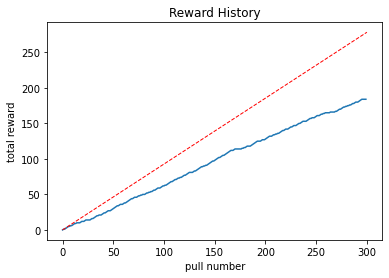

In [4]:
game = Game(300)
slots = [Slot(game) for i in range(10)]
player = Player(slots)

for i in range(game.num_pulls): 
    player.play()
game.plot_history()

## Rational Player

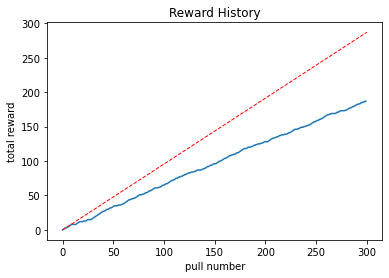

In [17]:
game = Game(300)
slots = [Slot(game) for i in range(10)]
#player = Player(slots)
player = RationalPlayer(slots, 0.01)

for i in range(game.num_pulls): 
    player.play()
game.plot_history()